In [60]:
import pandas as pd
data = pd.read_csv('Movie_Dataset/train.tsv', sep='\t')
data.tail()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156060 entries, 0 to 156059
Data columns (total 4 columns):
PhraseId      156060 non-null int64
SentenceId    156060 non-null int64
Phrase        156060 non-null object
Sentiment     156060 non-null int64
dtypes: int64(3), object(1)
memory usage: 4.8+ MB


In [61]:
data.Sentiment.value_counts()

2    79582
3    32927
1    27273
4     9206
0     7072
Name: Sentiment, dtype: int64

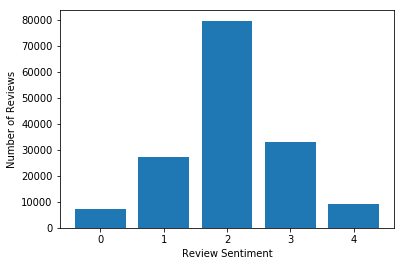

,PhraseId,SentenceId,Phrase
Sentiment,,,
0,7072,7072,7072
1,27273,27273,27273
2,79582,79582,79582
3,32927,32927,32927
4,9206,9206,9206


In [62]:
import matplotlib.pyplot as plt
Sentiment_count = data.groupby('Sentiment').count() # before count, just a dataframe of DataFrameGroupBy type
#Sentiment_count.index, just an integer
plt.bar(Sentiment_count.index,Sentiment_count['Phrase'])
plt.xlabel('Review Sentiment')
plt.ylabel('Number of Reviews')
plt.show()
Sentiment_count

In [63]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer
#tokenizer to remove unwanted elements from out data like symbols and numbers
token = RegexpTokenizer(r'[a-zA-Z0-9]+')# pattern =[a-zA-Z0-9]+
cv = CountVectorizer(lowercase = True,stop_words = 'english',ngram_range = (1,1), tokenizer = token.tokenize)
text_counts = cv.fit_transform(data['Phrase'])
print(text_counts)
print(cv.get_feature_names())
#Convert a text document to a matrix of token counts, sparse matrix is used,convert to lower case before tokenizing

  (0, 12673)	1
  (0, 584)	1
  (0, 593)	1
  (0, 9065)	1
  (0, 5512)	1
  (0, 5751)	1
  (0, 5735)	2
  (0, 294)	1
  (0, 3444)	1
  (0, 4517)	1
  (0, 11671)	1
  (1, 5751)	1
  (1, 5735)	1
  (1, 294)	1
  (1, 3444)	1
  (1, 4517)	1
  (1, 11671)	1
  (2, 11671)	1
  (4, 11671)	1
  (5, 5751)	1
  (5, 5735)	1
  (5, 294)	1
  (5, 3444)	1
  (5, 4517)	1
  (7, 5751)	1
  :	:
  (156050, 9054)	1
  (156050, 11305)	1
  (156051, 9054)	1
  (156051, 11305)	1
  (156052, 11305)	1
  (156053, 2271)	1
  (156053, 1006)	1
  (156053, 6156)	1
  (156053, 5252)	1
  (156053, 1281)	1
  (156053, 11281)	1
  (156054, 2271)	1
  (156054, 1006)	1
  (156054, 6156)	1
  (156054, 5252)	1
  (156054, 11281)	1
  (156055, 6156)	1
  (156055, 11281)	1
  (156056, 2271)	1
  (156056, 1006)	1
  (156056, 5252)	1
  (156057, 2271)	1
  (156057, 1006)	1
  (156058, 1006)	1
  (156059, 2271)	1
['000', '1', '10', '100', '101', '102', '103', '104', '105', '10th', '11', '110', '112', '12', '120', '127', '129', '12th', '13', '13th', '14', '140', '146', '15',

In [64]:
#Train-Test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(text_counts,data['Sentiment'],test_size = 0.3, random_state =123)#X,y
#Target variable for providing y

In [65]:
#Model Evaluation
from sklearn.naive_bayes import MultinomialNB
mn = MultinomialNB().fit(X_train,y_train)
predicted = mn.predict(X_test)

#Accuracy
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(predicted,y_test))

Accuracy: 0.608398479217395


## Feature Extraction using Tf-IDF

In [66]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf = TfidfVectorizer()
text_tf = tf.fit_transform(data['Phrase'])
print(text_tf)
type(text_tf)

  (0, 11837)	0.1761994204821687
  (0, 9227)	0.27061683772839323
  (0, 4577)	0.278538658922562
  (0, 3490)	0.2485059095620638
  (0, 13505)	0.17690005957760713
  (0, 288)	0.251134096800077
  (0, 13503)	0.08982508036989033
  (0, 14871)	0.1354415412970302
  (0, 7217)	0.17522921677393963
  (0, 5821)	0.2625302862532789
  (0, 5323)	0.20344769269023563
  (0, 5837)	0.22883807138484064
  (0, 529)	0.1614381914318891
  (0, 5595)	0.265796263188737
  (0, 12424)	0.1381592967010513
  (0, 14888)	0.28701927784529135
  (0, 9204)	0.19301332592202286
  (0, 602)	0.26341877863818697
  (0, 1879)	0.11034437734762885
  (0, 9085)	0.1898515417082945
  (0, 593)	0.22068902883834374
  (0, 13681)	0.07615285026452821
  (0, 8807)	0.1353879543646446
  (0, 12857)	0.12785637560254456
  (1, 11837)	0.29125926935214375
  :	:
  (156050, 625)	0.2115725833396903
  (156050, 11465)	0.670263619653983
  (156050, 9193)	0.6864890126115724
  (156051, 625)	0.21534359576868978
  (156051, 11465)	0.6822102168950972
  (156051, 9193)	0.6987

scipy.sparse.csr.csr_matrix

In [67]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(text_tf,data['Sentiment'],test_size = 0.3,random_state = 123)

In [68]:
#Model Evaluation
from sklearn.naive_bayes import MultinomialNB
mn = MultinomialNB().fit(X_train,y_train)
predicted = mn.predict(X_test)
print("Accuracy: ",metrics.accuracy_score(predicted,y_test))

Accuracy:  0.5865265496176684


In [84]:
#50:50
X_train,X_test,y_train,y_test = train_test_split(text_tf,data['Sentiment'],test_size = 0.5,random_state = 123)
mn = MultinomialNB().fit(X_train,y_train)
predicted = mn.predict(X_test)
acc_50 = metrics.accuracy_score(predicted,y_test)
print("Accuracy: ",acc_50)

Accuracy:  0.5748301935153146


In [85]:
#60:40
X_train,X_test,y_train,y_test = train_test_split(text_tf,data['Sentiment'],test_size = 0.4,random_state = 123)
mn = MultinomialNB().fit(X_train,y_train)
predicted = mn.predict(X_test)
acc_40 = metrics.accuracy_score(predicted,y_test)
print("Accuracy: ",acc_40)

Accuracy:  0.5812027425349224


In [86]:
#70:30
X_train,X_test,y_train,y_test = train_test_split(text_tf,data['Sentiment'],test_size = 0.3,random_state = 123)
mn = MultinomialNB().fit(X_train,y_train)
predicted = mn.predict(X_test)
acc_30 = metrics.accuracy_score(predicted,y_test)
print("Accuracy: ",acc_30)

Accuracy:  0.5865265496176684


In [87]:
#80:20
X_train,X_test,y_train,y_test = train_test_split(text_tf,data['Sentiment'],test_size = 0.2,random_state = 123)
mn = MultinomialNB().fit(X_train,y_train)
predicted = mn.predict(X_test)
acc_20 = metrics.accuracy_score(predicted,y_test)
print("Accuracy: ",acc_20)

Accuracy:  0.5906061771113674


In [88]:
#90:10
X_train,X_test,y_train,y_test = train_test_split(text_tf,data['Sentiment'],test_size = 0.1,random_state = 123)
mn = MultinomialNB().fit(X_train,y_train)
predicted = mn.predict(X_test)
acc_10 = metrics.accuracy_score(predicted,y_test)
print("Accuracy: ",acc_10)

Accuracy:  0.5964372677175446


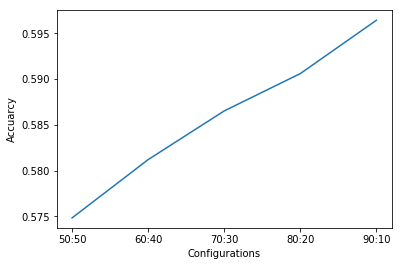

In [90]:
import matplotlib.pyplot as plt
x = ['50:50','60:40','70:30','80:20','90:10']
y = [acc_50,acc_40,acc_30,acc_20,acc_10]

plt.plot(x,y)
plt.xlabel("Configurations")
plt.ylabel("Accuarcy")
plt.show()